In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the IMDB dataset (pre-tokenized, 10k word vocab)

In [2]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


# Pad sequences to the same length

In [3]:
maxlen = 200
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

# Build the model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),  # Word embeddings
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),                              # Bidirectional LSTM
    tf.keras.layers.Dense(64, activation='relu'),                                         # Dense layer
    tf.keras.layers.Dense(1, activation='sigmoid')                                        # Output: 0 (neg) or 1 (pos)
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Compile the model

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [6]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 139ms/step - accuracy: 0.6882 - loss: 0.5550 - val_accuracy: 0.8446 - val_loss: 0.3614
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.9087 - loss: 0.2371 - val_accuracy: 0.8444 - val_loss: 0.3768
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.9306 - loss: 0.1898 - val_accuracy: 0.8450 - val_loss: 0.3702


# Evaluate on test data

In [7]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.85


# Plot training/validation accuracy

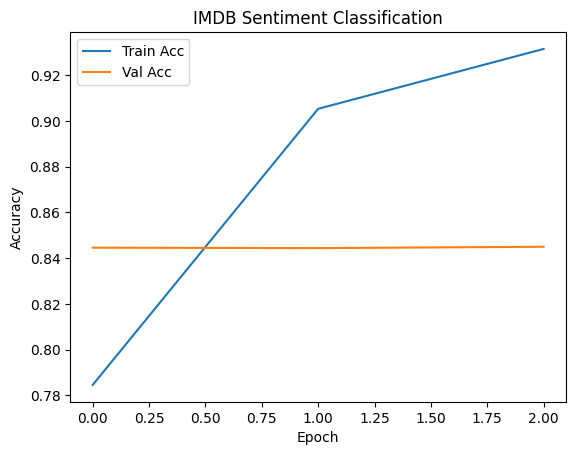

In [8]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("IMDB Sentiment Classification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()